# Multiple Linear Regression To Predict Index Price

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

+ Read data into a dataframe and print the head

In [2]:
economic_index_df = pd.read_csv('economic_index.csv')
economic_index_df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


+ describe the data

In [3]:
economic_index_df.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


Check for any missing values

In [4]:
economic_index_df.isna().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## correlation

#### Drop any columns not necesssary in the calculation of the index price

In [5]:
economic_index_df.drop(['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)
economic_index_df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
economic_index_df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


#### visualize the correlation

<Axes: >

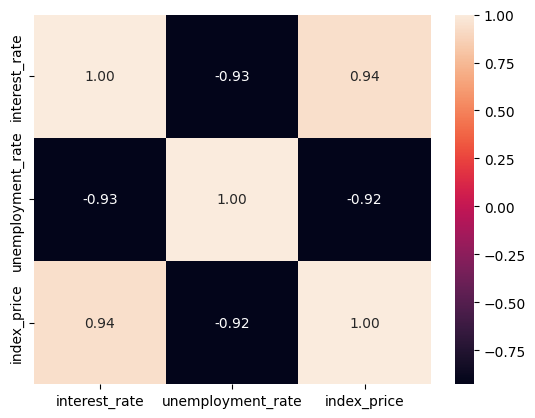

In [7]:
sns.heatmap(economic_index_df.corr(),fmt='.2f', annot=True)

pair plot dependant and independent variables

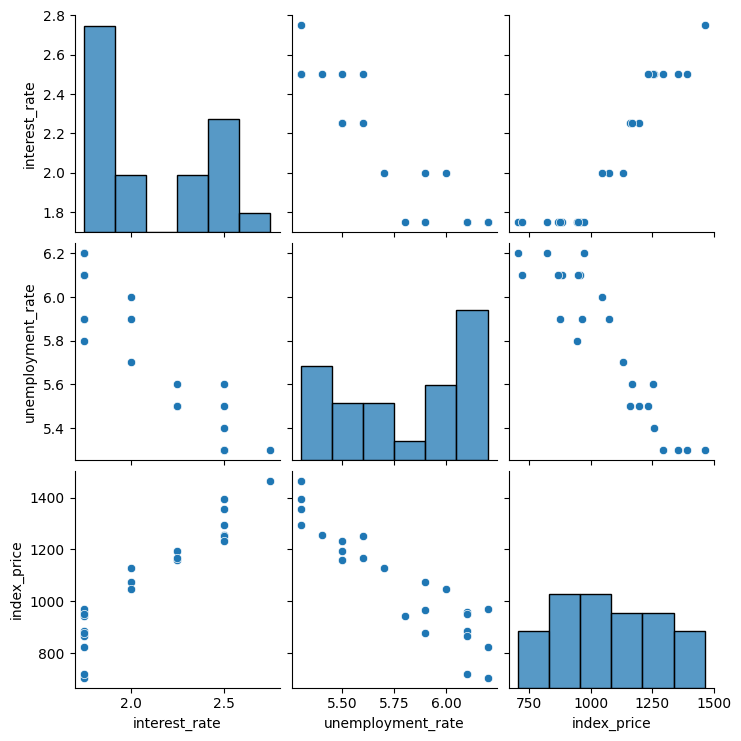

In [8]:
sns.pairplot(economic_index_df)

## Model

#### Define dependant and independent variables

Take interest_rate and unemployment_rate as the independent variables

In [9]:
X = economic_index_df[['interest_rate', 'unemployment_rate']]

Take index_price as the dependant variable

In [10]:
y = economic_index_df['index_price']

#### Split the data into train and test subsets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

#### Normalize the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### build model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X_train, y_train)

LinearRegression()

+ get the coefficients

In [18]:
regression.coef_

array([  88.27275507, -116.25716066])

+ get the y intercept 

In [19]:
regression.intercept_

1053.4444444444443

#### cross validation

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
validation_score = cross_val_score(regression, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
np.mean(validation_score)

-5914.828180162386

In [22]:
y_predict = regression.predict(X_test)
y_predict

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

## Performance Metrics

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE
})

{'MAE': 73.80444932337097, 'MSE': 8108.567426306604, 'RMSE': 90.04758423359621}


#### R Squared

In [25]:
r2 = r2_score(y_test, y_predict)
r2

0.7591371539010257

#### Adjusted R Squared

The formula for adjusted R squared is:
        <h3 style="padding-left:100px">1-[(1-r2)*(n-1)/(n-k-1)]</h3>
where:
    <p style="padding-left:25px">r2 is the r squared for the model, n is the number of observations and K is the number of predictor variables</p> 

In [26]:
1-((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.5985619231683761

## Build the model using OLS

In [27]:
import statsmodels.api as sm

In [28]:
model = sm.OLS(y_train, X_train).fit()

In [29]:
y_prediction = model.predict(X_test)

In [30]:
model.summary()

/home/brion/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                       0.754
Time:                        12:58:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note that the coefficients for both models are approximately similar